<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week6/Assignment_Modul_Minggu6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOAL 1: Buat model Decision Tree untuk mengklasifikasikan Quality buah berdasarkan fitur-fitur lainnya (“Size“,“Weight“,“Sweetness“,“Crunchiness“,“Juiciness“,“Ripeness“, dan “Acidity“). Gunakan data uji sebesar 20% dan nilai random_state sebesar 32. Tampilkan pohon keputusan yang dihasilkan dengan nilai max_depth sebesar 2 dan hitung akurasi dari model tersebut.

Akurasi: 0.675


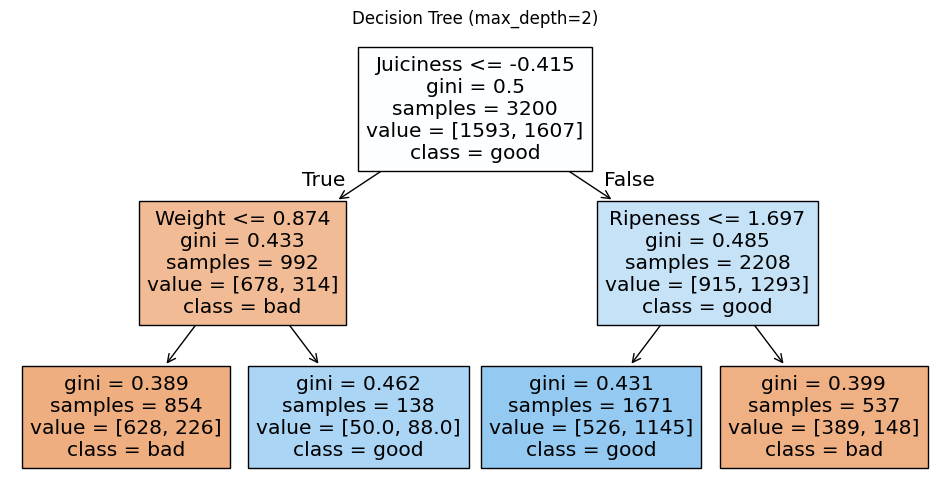

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


data = pd.read_csv('/content/sample_data/apple_quality.csv')
X = data.drop(['Quality'], axis=1)
y = data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
clf = DecisionTreeClassifier(max_depth=2, random_state=32)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree (max_depth=2)")
plt.show()

SOAL 2: Implementasikan model K-Nearest Neighbor (KNN) untuk mengklasifikasikan “Quality” buah. Gunakan data uji sebesar 20% dan nilai random_state sebesar 32. Lakukan eksperimen dengan berbagai nilai K (misalnya 3, 5, 7, 9) dan evaluasi akurasi dari setiap nilai K beserta confusion matrix.


K = 3
Akurasi: 0.56375
Confusion Matrix:
 [[222 181]
 [168 229]]


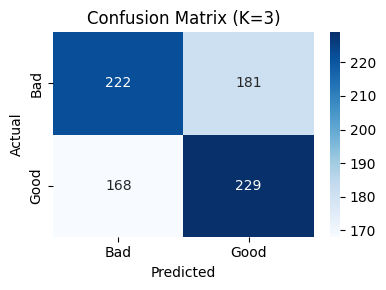


K = 5
Akurasi: 0.54
Confusion Matrix:
 [[205 198]
 [170 227]]


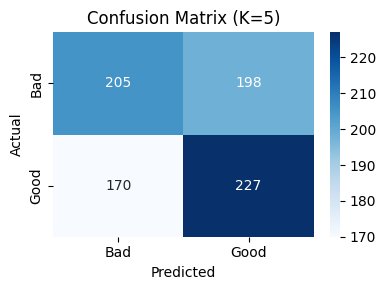


K = 7
Akurasi: 0.51625
Confusion Matrix:
 [[200 203]
 [184 213]]


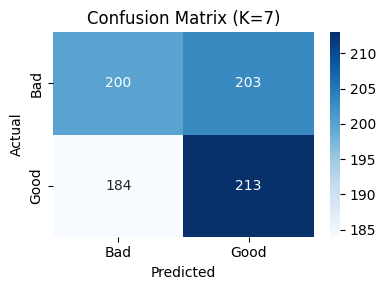


K = 9
Akurasi: 0.51875
Confusion Matrix:
 [[199 204]
 [181 216]]


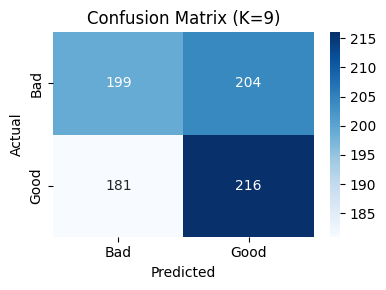

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('/content/sample_data/apple_quality.csv')
le = LabelEncoder()
data['Quality'] = le.fit_transform(df['Quality'])  # Good -> 1, Bad -> 0

X = df.drop('Quality', axis=1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

k_values = [3, 5, 7, 9]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nK = {k}")
    print("Akurasi:", acc)
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    plt.title(f"Confusion Matrix (K={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()